In [140]:
import pandas as pd

data = pd.read_csv('Student_List_A2.csv')

print("Columns name: ", data.columns)

Columns name:  Index(['StudentID', 'Age', 'StudyTimeWeekly', 'Absences', 'ParentalSupport',
       'GPA', 'GradeClass'],
      dtype='object')


In [141]:
import pandas as pd

file = 'Student_List_A2.csv'

data = pd.read_csv('Student_List_A2.csv')

grade_mapping = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'F'}   #Create dictionary to change letter from number 

data['GradeClass'] = data['GradeClass'].map(grade_mapping).astype(str)  #use map function change 'gradeclass'column and chage it to string

data.to_csv(file, index=False)

In [142]:
import pandas as pd       #cannot be run alone. need to run the code of A1.2 before running it

file = 'Student_List_A2.csv'

data = pd.read_csv('Student_List_A2.csv')

grade_start = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'F': 4}     #change gradeclass column to number again 

data['GradeClass'] = data['GradeClass'].map(grade_start)   #if this column doesn't change back to the number then will disappear

column = data.select_dtypes(include=[np.number]).columns   #use the select_dtypes to filter out columns and store in 'column' variable

data[numeric_cols] = data[column].fillna(data[column].median())  #use median to fill in

grade_mapping = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'F'}   #change back to letter

data['GradeClass'] = data['GradeClass'].map(grade_mapping).astype(str)

data.to_csv(file, index=False)

In [144]:
import pandas as pd

file = 'Student_List_A2.csv'

data = pd.read_csv('Student_List_A2.csv')

data = data[data['Absences'] <= 50]     #give a range so that the data is not outrageous 

data.to_csv(file, index=False)

In [145]:
import pandas as pd

file = 'Student_List_A2.csv'

data = pd.read_csv('Student_List_A2.csv')

def choose_data(row):       #set a function that uses if-loop to select data that does not satisfy the condition
    if row['GradeClass'] == 'A' and row['GPA'] >= 3.5:
        return True
    elif row['GradeClass'] == 'B' and 3.0 <= row['GPA'] < 3.5:
        return True
    elif row['GradeClass'] == 'C' and 2.5 <= row['GPA'] < 3.0:
        return True
    elif row['GradeClass'] == 'D' and 2.0 <= row['GPA'] < 2.5:
        return True
    elif row['GradeClass'] == 'F' and row['GPA'] < 2.0:
        return True
    else:
        return False

new_data = data[data.apply(choose_data, axis=1)]  #use apply to apply the selection function to each row of data

new_data.to_csv(file, index=False)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('Student_List_A2.csv')

X = data.drop(columns=['StudentID', 'GradeClass', 'GPA'])    #delete useless columns
Y = data['GradeClass']      #extract the target variable Y

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) 
# use the train_test_split function to divide the data set into training and test sets

scaler = StandardScaler()    #data standardization
X_train_scaled = scaler.fit_transform(X_train)   #the mean and standard deviation of the training set are calculated and normalized
X_test_scaled = scaler.transform(X_test)         #standardize the test set

In [146]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

data = pd.read_csv('Student_List_A2.csv')

X = data.drop(columns=['StudentID', 'GradeClass', 'GPA']) 
Y = data['GradeClass']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC(kernel='linear', random_state=42)     #choose the SVM model and choose the linear kernel
svm_model.fit(X_train_scaled, Y_train)                

Y_predict = svm_model.predict(X_test_scaled)          #use the trained model to make predict on the test

matrix = confusion_matrix(Y_test, Y_predict, labels=['A', 'B', 'C', 'D', 'F'])   #calculate the confusion matrix and determine the matrix order

print("Confusion matrix of 5x5:")
print(matrix)       #print matrix

accuracy = accuracy_score(Y_test, Y_predict)     #computational accuracy
print(f"Accuracy of SVM model: {accuracy:.2f}")

Confusion matrix of 5x5:
[[  0  11   0   0   0]
 [  0  26  15   0   0]
 [  0  11  32  10   1]
 [  0   0  15  43  12]
 [  0   0   0  15 209]]
Accuracy of SVM model: 0.78


In [148]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

file = 'Student_List_A2.csv'
data = pd.read_csv('Student_List_A2.csv')

X = data.drop(columns=['StudentID', 'GradeClass', 'GPA'])  
Y = data['GradeClass']  

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=44)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

DecisionTree = DecisionTreeClassifier(random_state=45)   #create a decision tree model

DecisionTree.fit(X_train_scaled, Y_train)       #using decision trees mod on a training set

Y_predict = dt_model.predict(X_test_scaled)     #use trained model to make predict on the test

print("Confusion matrix of 5x5:\n", confusion_matrix(Y_test, Y_predict))      #print matrix
print("Accuracy of decision tree model:", accuracy_score(Y_test, Y_predict))     #computational accuracy

Confusion matrix of 5x5:
 [[  7   4   0   0   0]
 [  6  10  14   0   0]
 [  1  20  25  14   0]
 [  0   1  20  38  17]
 [  0   0   1  14 208]]
Accuracy of decision tree model: 0.72


In [149]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

data = pd.read_csv('Student_List_A2.csv')

X = data.drop(columns=['StudentID', 'GradeClass', 'GPA'])  
Y = data['GradeClass']  

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)

svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, Y)

new_data = pd.read_csv('Student_List_A2_Submission.csv')

X_new = new_data.drop(columns=['StudentID'])     #remove useless columns

X_new_scaled = scaler.transform(X_new)    #standardize the new data, using the parameters previously trained

new_predict = svm_model.predict(X_new_scaled)   #make predict about new data

new_print = pd.DataFrame({                 #columns to save
    'StudentID': new_data['StudentID'],  
    'GradeClass': new_predict        
})

new_print.to_csv('Student_List_A2_Predictions.csv', index=False)   #save the result to a new csv file


Check for missing values：
Year                                   0
Company                                0
Category                               0
Market Cap(in B USD)                   1
Revenue                                0
Gross Profit                           0
Net Income                             0
Earning Per Share                      0
EBITDA                                 0
Share Holder Equity                    0
Cash Flow from Operating               0
Cash Flow from Investing               0
Cash Flow from Financial Activities    0
Current Ratio                          0
Debt/Equity Ratio                      0
ROE                                    0
ROA                                    0
ROI                                    0
Net Profit Margin                      0
Free Cash Flow per Share               0
Return on Tangible Equity              0
Number of Employees                    0
Inflation Rate(in US)                  0
dtype: int64

Missing value af

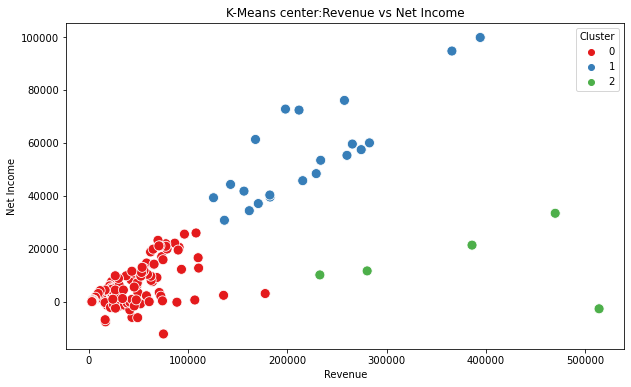

In [150]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('Financial Statements.csv')    #read csv file

print("\nCheck for missing values：")    #checks for missing values and outputs the missing number for each row
print(data.isnull().sum())           

data.dropna(inplace=True)        #delete all rows that contain missing values

data.to_csv('Financial Statements_new.csv', index=False)    #save the processed data to a new csv file

print("\nMissing value after processing：")
print(data.isnull().sum())       #check for missing values again, make sure no missing value

X = data[['Revenue', 'Net Income']]     #select two columns

scaler = StandardScaler()        #standardized data
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)     #create the KMeans clustering model and set the number to 3
kmeans.fit(X_scaled)

data['Cluster'] = kmeans.labels_      #adds cluster labels to the raw data set

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Revenue', y='Net Income', hue='Cluster', data=data, palette='Set1', s=100)
plt.title('K-Means center:Revenue vs Net Income')
plt.xlabel('Revenue')
plt.ylabel('Net Income')
plt.show()